In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### Readin Assigments 

In [2]:
assignment = pd.read_csv("/Users/ling/Desktop/Interview/AirBnB/3_8_2019/guest_assignments.csv")
assignment.head()

,guest_id,assignment,guest_country
0,V4R1E83L3,treatment,A
1,2MYGU7CPV,treatment,I
2,05XRLU41S,treatment,A
3,4Y8XIMNNI,treatment,G
4,26H4M8NRC,control,A


In [3]:
assignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410035 entries, 0 to 410034
Data columns (total 3 columns):
guest_id         410035 non-null object
assignment       410035 non-null object
guest_country    410035 non-null object
dtypes: object(3)
memory usage: 9.4+ MB


In [4]:
assignment.describe()

,guest_id,assignment,guest_country
count,410035,410035,410035
unique,410035,2,9
top,XFIDXE6ZP,control,A
freq,1,205651,174181


In [4]:
assignment['assignment'].value_counts()

control      205651
treatment    204384
Name: assignment, dtype: int64

In [5]:
assignment['guest_country'].value_counts()

A    174181
B     63925
C     42749
D     29717
E     26834
F     23323
I     21470
H     15690
G     12146
Name: guest_country, dtype: int64

### Readin Pagments

In [6]:
payments = pd.read_csv("/Users/ling/Desktop/Interview/AirBnB/3_8_2019/payments_page_impressions.csv")
payments.head()

,payments_page_impression_id,guest_id,impression_time,booking_value_usd,nights,date_of_checkin,booking_successful,payment_option
0,B8ICEPZSYLVS,V4R1E83L3,8/26/18 20:37,173.02,3,8/29/18 0:00,0,NaN
1,HGFG2EJO9M05,2MYGU7CPV,8/22/18 16:10,37.78,1,8/23/18 0:00,0,NaN
2,LBFT5OYTB5DX,05XRLU41S,8/29/18 6:21,705.17,4,10/1/18 0:00,1,pluf
3,0TEZ2Y6ZQYK3,4Y8XIMNNI,8/15/18 23:12,40.29,1,8/16/18 0:00,1,pay_in_full
4,O74E8Z9B6K13,26H4M8NRC,8/19/18 1:54,224.56,3,8/19/18 0:00,1,pay_in_full


In [7]:
payments.describe()

,booking_value_usd,nights,booking_successful
count,5.961340e+05,596134.000000,596134.000000
mean,6.331671e+02,4.722044,0.391207
std,1.220486e+04,4.881205,0.488021
min,1.001000e+01,1.000000,0.000000
25%,1.366500e+02,2.000000,0.000000
50%,3.450400e+02,4.000000,0.000000
75%,7.016600e+02,6.000000,1.000000
max,9.289329e+06,856.000000,1.000000


In [8]:
payments['guest_id'].nunique()

410035

In [9]:
payments['payment_option'].value_counts()

pay_in_full    211171
pluf            22041
Name: payment_option, dtype: int64

In [10]:
payments['payment_option_fillna']=payments['payment_option'].fillna('missing')

In [11]:
payments['payment_option_fillna'].value_counts()

missing        362922
pay_in_full    211171
pluf            22041
Name: payment_option_fillna, dtype: int64

In [12]:
payments.groupby(['payment_option_fillna'])['guest_id'].nunique()

payment_option_fillna
missing        231081
pay_in_full    199580
pluf            21520
Name: guest_id, dtype: int64

In [13]:
payments['booking_successful'].value_counts()

0    362922
1    233212
Name: booking_successful, dtype: int64

In [14]:
payments.groupby(['booking_successful'])['guest_id'].nunique()

booking_successful
0    231081
1    220406
Name: guest_id, dtype: int64

In [15]:
payments.groupby(['payment_option_fillna','booking_successful'])['guest_id'].nunique()

payment_option_fillna  booking_successful
missing                0                     231081
pay_in_full            1                     199580
pluf                   1                      21520
Name: guest_id, dtype: int64

In [16]:
payments.groupby(['payment_option_fillna','booking_successful'])['booking_value_usd'].mean()

payment_option_fillna  booking_successful
missing                0                     782.114304
pay_in_full            1                     342.152349
pluf                   1                     968.798476
Name: booking_value_usd, dtype: float64

### Join tables

In [17]:
all = pd.merge(assignment, payments, left_on=['guest_id'], right_on=['guest_id'], how='left')

In [18]:
all.head()

,guest_id,assignment,guest_country,payments_page_impression_id,impression_time,booking_value_usd,nights,date_of_checkin,booking_successful,payment_option,payment_option_fillna
0,V4R1E83L3,treatment,A,B8ICEPZSYLVS,8/26/18 20:37,173.02,3.0,8/29/18 0:00,0.0,NaN,missing
1,2MYGU7CPV,treatment,I,HGFG2EJO9M05,8/22/18 16:10,37.78,1.0,8/23/18 0:00,0.0,NaN,missing
2,05XRLU41S,treatment,A,LBFT5OYTB5DX,8/29/18 6:21,705.17,4.0,10/1/18 0:00,1.0,pluf,pluf
3,05XRLU41S,treatment,A,NU5B9C3SLHK2,8/29/18 5:41,681.72,4.0,10/1/18 0:00,0.0,NaN,missing
4,4Y8XIMNNI,treatment,G,0TEZ2Y6ZQYK3,8/15/18 23:12,40.29,1.0,8/16/18 0:00,1.0,pay_in_full,pay_in_full


In [19]:
all['assignment'].value_counts()

control      299016
treatment    297117
Name: assignment, dtype: int64

In [20]:
all.groupby(['assignment'])['guest_id'].nunique()

assignment
control      205651
treatment    204384
Name: guest_id, dtype: int64

In [21]:
all.groupby(['assignment', 'payment_option_fillna'])['guest_id'].nunique()

assignment  payment_option_fillna
control     missing                  116301
            pay_in_full              109944
treatment   missing                  114779
            pay_in_full               89634
            pluf                      21520
Name: guest_id, dtype: int64

In [22]:
all.groupby(['assignment','payment_option_fillna','booking_successful'])['guest_id'].nunique()

assignment  payment_option_fillna  booking_successful
control     missing                0.0                   116301
            pay_in_full            1.0                   109944
treatment   missing                0.0                   114779
            pay_in_full            1.0                    89634
            pluf                   1.0                    21520
Name: guest_id, dtype: int64

In [23]:
all.groupby(['assignment', 'payment_option_fillna','booking_successful'])['booking_value_usd'].mean()

assignment  payment_option_fillna  booking_successful
control     missing                0.0                   808.028586
            pay_in_full            1.0                   393.675677
treatment   missing                0.0                   755.850400
            pay_in_full            1.0                   278.952966
            pluf                   1.0                   968.798476
Name: booking_value_usd, dtype: float64

In [24]:
all.groupby(['guest_country', 'payment_option_fillna','booking_successful'])['booking_value_usd'].mean()

guest_country  payment_option_fillna  booking_successful
A              missing                0.0                    932.508746
               pay_in_full            1.0                    420.343394
               pluf                   1.0                   1086.764086
B              missing                0.0                    693.400162
               pay_in_full            1.0                    276.865763
               pluf                   1.0                    779.673116
C              missing                0.0                    769.225269
               pay_in_full            1.0                    327.606164
               pluf                   1.0                    876.077480
D              missing                0.0                    740.143052
               pay_in_full            1.0                    327.422108
               pluf                   1.0                   1163.963392
E              missing                0.0                    748.729332
       

### Question 1 a)

In [24]:
tot_success = all.groupby(['assignment', 'guest_id'])['booking_successful'].sum().reset_index()

In [25]:
tot_success.groupby('assignment')['guest_id'].size()

assignment
control      205651
treatment    204384
Name: guest_id, dtype: int64

In [26]:
tot_success_dist = pd.crosstab(tot_success['assignment'],tot_success['booking_successful'])
tot_success_dist

booking_successful,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
assignment,,,,,,,,,
control,95707,104392,4886,549,81,28,5,2,1
treatment,93924,104916,4855,556,92,30,7,3,1


In [27]:
tot_success.groupby(['assignment'])['booking_successful'].mean()

assignment
control      0.565652
treatment    0.571879
Name: booking_successful, dtype: float64

In [28]:
%load_ext rpy2.ipython

/Users/ling/miniconda3/lib/python3.7/site-packages/jinja2/utils.py:485: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/Users/ling/miniconda3/lib/python3.7/site-packages/jinja2/runtime.py:318: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [29]:
%Rpush tot_success

/Users/ling/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [30]:
%%R
str(tot_success)

'data.frame':	410035 obs. of  3 variables:
 $ assignment        : chr  "control" "control" "control" "control" ...
 $ guest_id          : chr  "0007JRX8Q" "000AFV1ZT" "000MF6Y2E" "000S4WNYW" ...
 $ booking_successful: num  0 1 1 1 0 0 1 1 1 0 ...


In [31]:
%%R
tab=table(tot_success$assignment, tot_success$booking_successful)
tab

           
                 0      1      2      3      4      5      6      7      8
  control    95707 104392   4886    549     81     28      5      2      1
  treatment  93924 104916   4855    556     92     30      7      3      1


In [45]:
%%R
chisq.test(tab)


	Pearson's Chi-squared test

data:  tab
X-squared = 15.606, df = 8, p-value = 0.04837



In [37]:
%%R
t.test(booking_successful~assignment, data=tot_success)


	Welch Two Sample t-test

data:  booking_successful by assignment
t = -3.5326, df = 410010, p-value = 0.0004116
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.009681762 -0.002772067
sample estimates:
  mean in group control mean in group treatment 
              0.5656525               0.5718794 



In [35]:
%%R
model = glm(booking_successful ~ assignment, data=tot_success, family=possion)
summary(model)


Call:
glm(formula = booking_successful ~ assignment, family = poisson, 
    data = tot_success)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0695  -1.0636   0.5113   0.5204   5.2458  

Coefficients:
                     Estimate Std. Error  z value Pr(>|z|)    
(Intercept)         -0.569775   0.002932 -194.332   <2e-16 ***
assignmenttreatment  0.010948   0.004141    2.644   0.0082 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 300807  on 410034  degrees of freedom
Residual deviance: 300800  on 410033  degrees of freedom
AIC: 749024

Number of Fisher Scoring iterations: 5



In [85]:
from sklearn.utils import resample
# configure bootstrap
n_iterations = 1000
n_size = int(len(tot_success) * 0.50)

# run bootstrap
stats = list()
for i in range(n_iterations):
    sample = resample(tot_success, n_samples=n_size)

    # fit model
    grpmean = list(sample.groupby(['assignment'])['booking_successful'].mean())
    diff = grpmean[1]-grpmean[0]
    stats.append(diff)

In [86]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
est = sum(stats)/len(stats)
lower = np.percentile(stats, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(stats, p)
print('group mean %.5f' % (est))
print('%.1f confidence interval %.5f and %.5f' % (alpha*100, lower, upper))

group mean 0.00619
95.0 confidence interval 0.00141 and 0.01115


### Question 1 b)

In [26]:
all['booking_value_realized'] = all['booking_value_usd']*all['booking_successful']
tot_val = all.groupby(['assignment', 'guest_country', 'guest_id'])['booking_value_realized'].sum().reset_index()

In [27]:
tot_val['assignment'].value_counts()

control      205651
treatment    204384
Name: assignment, dtype: int64

In [28]:
tot_val['guest_country'].value_counts()

A    174181
B     63925
C     42749
D     29717
E     26834
F     23323
I     21470
H     15690
G     12146
Name: guest_country, dtype: int64

In [29]:
tot_val['booking_value_realized'].describe()

count    410035.000000
mean        228.285036
std         544.789141
min           0.000000
25%           0.000000
50%          39.390000
75%         225.820000
max       35842.150000
Name: booking_value_realized, dtype: float64

In [30]:
countries = list(tot_val['guest_country'].value_counts().reset_index()['index'])
for country in countries:
    print('Country == ' + country)
    print(tot_val[tot_val['guest_country']==country]['booking_value_realized'].describe())

Country == A
count    174181.000000
mean        288.881112
std         662.403765
min           0.000000
25%           0.000000
50%          54.610000
75%         314.510000
max       35842.150000
Name: booking_value_realized, dtype: float64
Country == B
count    63925.000000
mean       179.866765
std        409.569418
min          0.000000
25%          0.000000
50%         34.470000
75%        191.280000
max      20064.740000
Name: booking_value_realized, dtype: float64
Country == C
count    42749.000000
mean       222.220344
std        499.728075
min          0.000000
25%          0.000000
50%         46.540000
75%        238.950000
max      13994.870000
Name: booking_value_realized, dtype: float64
Country == D
count    29717.000000
mean       229.659781
std        541.122282
min          0.000000
25%          0.000000
50%         35.580000
75%        236.140000
max      16262.640000
Name: booking_value_realized, dtype: float64
Country == E
count    26834.000000
mean       237.717490

In [34]:
tot_val.loc[tot_val['booking_value_realized']==35842.15]

,assignment,guest_country,guest_id,booking_value_realized
28141,control,A,BMRUCJOFD,35842.15


In [36]:
all.loc[all['guest_id']=='BMRUCJOFD']

,guest_id,assignment,guest_country,payments_page_impression_id,impression_time,booking_value_usd,nights,date_of_checkin,booking_successful,payment_option,payment_option_fillna,booking_value_realized
53198,BMRUCJOFD,control,A,0ZLBUB2B3O8H,8/19/18 16:54,34100.59,209.0,8/30/18 0:00,1.0,pay_in_full,pay_in_full,34100.59
53199,BMRUCJOFD,control,A,FW7LZWS4OSKA,8/17/18 3:31,1089.69,6.0,9/6/18 0:00,1.0,pay_in_full,pay_in_full,1089.69
53200,BMRUCJOFD,control,A,11L5YQEJ6DLK,8/17/18 3:54,651.87,3.0,9/10/18 0:00,1.0,pay_in_full,pay_in_full,651.87


In [31]:
grp_mean = tot_val.groupby(['guest_country', 'assignment'])['booking_value_realized'].mean().reset_index()
grp_mean_pivot = grp_mean.pivot(index='guest_country', columns='assignment',values='booking_value_realized').reset_index()

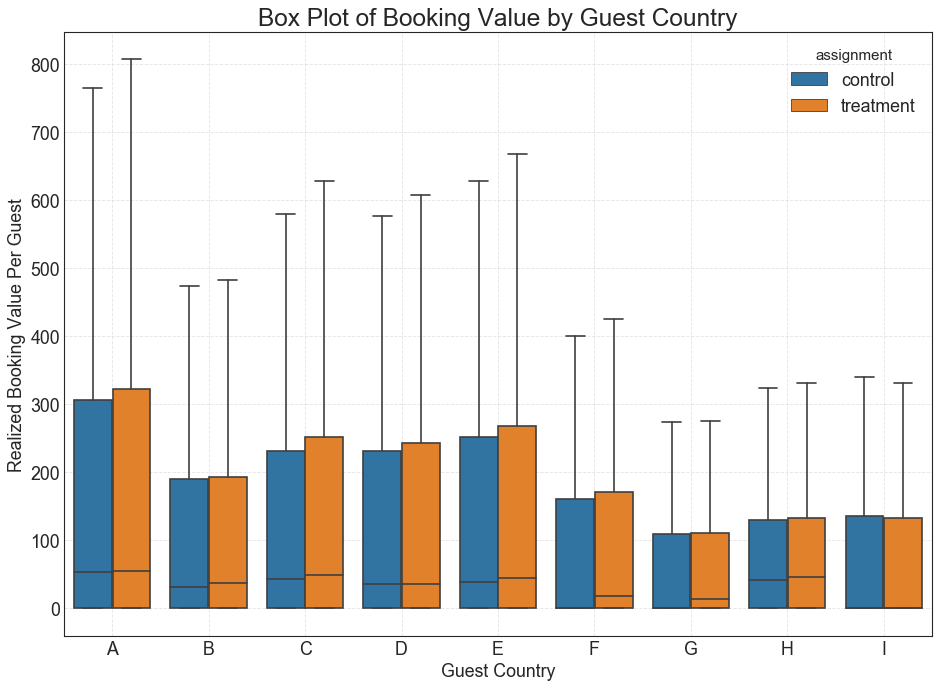

In [32]:
plt.figure(figsize=(14,10), dpi= 80)
sns.boxplot(x='guest_country', y='booking_value_realized', hue='assignment', data=tot_val, notch=False, showfliers=False)

# Decorations
plt.gca().set(xlabel='Guest Country', ylabel='Realized Booking Value Per Guest')
plt.title('Box Plot of Booking Value by Guest Country', fontsize=22)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [181]:
# define bootstrap_func
def bootstrap_func(df, group_col, y):
    n_iterations = 1000
    n_size = int(len(df) * 0.50)
    stats = list()
    for i in range(n_iterations):
        sample = resample(df, n_samples=n_size)
        mean_dict = {grp[0]:grp[1][y].mean() for grp in sample.groupby(group_col)}
        stats.append(mean_dict['treatment']-mean_dict['control'])
    est_diff = sum(stats)/len(stats)
    lower = np.percentile(stats, 0.025)
    upper = np.percentile(stats, 97.5)
    return({'est':est, 'lower':lower, 'upper':upper})
    
countries = list(tot_val['guest_country'].value_counts().reset_index()['index'])
final=[]
for country in countries:
    df = tot_val.loc[tot_val['guest_country']==country]
    result = bootstrap_func(df, 'assignment', 'booking_value_realized')
    base_header = {'country': country}
    final.append(dict(base_header, **result))

In [194]:
grp_mean_boostrap = pd.DataFrame(final)

In [203]:
pd.merge(grp_mean_pivot, grp_mean_boostrap, left_on='guest_country', right_on='country')

,guest_country,control,treatment,country,est,lower,upper
0,A,282.632385,295.172388,A,12.610841,-0.168811,20.674967
1,B,177.725565,182.019182,B,4.152694,-10.293503,12.800744
2,C,216.148288,228.287573,C,12.139746,-8.229067,25.807844
3,D,212.431303,247.003434,D,34.866991,4.409607,51.625253
4,E,237.670564,237.764717,E,0.016715,-29.690834,17.933609
5,F,133.588552,143.972858,F,10.203793,-9.481463,21.453711
6,G,121.145898,137.743355,G,17.019852,-8.166770,33.995592
7,H,102.867701,113.308359,H,10.446789,-7.037804,20.353120
8,I,120.593776,120.059159,I,-0.502539,-19.658415,10.261280


### Question 1 c)

In [25]:
missing = all[all['impression_time'].isnull()==True]
all_gap = all.drop(missing.index, axis=0)
all_gap['booking_value_realized'] = all_gap['booking_value_usd']*all_gap['booking_successful']
all_gap['imp_dt'] = all_gap['impression_time'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%y %H:%M'))
all_gap['checkin_dt'] = all_gap['date_of_checkin'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%y %H:%M'))
all_gap['delta'] = all_gap['checkin_dt'] - all_gap['imp_dt']
all_gap['gap'] = all_gap['delta'].apply(lambda x: max(0, x.days))

In [27]:
all_gap.head()

,guest_id,assignment,guest_country,payments_page_impression_id,impression_time,booking_value_usd,nights,date_of_checkin,booking_successful,payment_option,payment_option_fillna,booking_value_realized,imp_dt,checkin_dt,delta,gap
0,V4R1E83L3,treatment,A,B8ICEPZSYLVS,8/26/18 20:37,173.02,3.0,8/29/18 0:00,0.0,NaN,missing,0.00,2018-08-26 20:37:00,2018-08-29,2 days 03:23:00,2
1,2MYGU7CPV,treatment,I,HGFG2EJO9M05,8/22/18 16:10,37.78,1.0,8/23/18 0:00,0.0,NaN,missing,0.00,2018-08-22 16:10:00,2018-08-23,0 days 07:50:00,0
2,05XRLU41S,treatment,A,LBFT5OYTB5DX,8/29/18 6:21,705.17,4.0,10/1/18 0:00,1.0,pluf,pluf,705.17,2018-08-29 06:21:00,2018-10-01,32 days 17:39:00,32
3,05XRLU41S,treatment,A,NU5B9C3SLHK2,8/29/18 5:41,681.72,4.0,10/1/18 0:00,0.0,NaN,missing,0.00,2018-08-29 05:41:00,2018-10-01,32 days 18:19:00,32
4,4Y8XIMNNI,treatment,G,0TEZ2Y6ZQYK3,8/15/18 23:12,40.29,1.0,8/16/18 0:00,1.0,pay_in_full,pay_in_full,40.29,2018-08-15 23:12:00,2018-08-16,0 days 00:48:00,0


#### First Metrics

In [32]:
missing = all[all['impression_time'].isnull()==True]

all_imp = all.drop(missing.index, axis=0)
all_imp['booking_value_realized'] = all_gap['booking_value_usd']*all_gap['booking_successful']
all_imp['imp_dt'] = all_gap['impression_time'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%y %H:%M').date())
all_imp['checkin_dt'] = all_gap['date_of_checkin'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%y %H:%M').date())

In [139]:
df1 = all_imp.groupby(['imp_dt', 'assignment']).size().reset_index(name='imps')
df2 = all_imp.groupby(['imp_dt', 'assignment'])['booking_successful'].sum().reset_index(name='booking_successful')
df3 = all_imp.groupby(['imp_dt', 'assignment'])['booking_value_realized'].mean().reset_index(name='booking_value_realized_imp')
df4 = all_imp.groupby(['imp_dt', 'assignment'])['guest_id'].nunique().reset_index(name='users')

from functools import reduce
df_all = [df1, df2, df3, df4]
df = reduce(lambda  left,right: pd.merge(left,right,on=['imp_dt', 'assignment'],how='outer'), df_all)

In [154]:
df['booking_ratio'] = df['booking_successful']/df['imps']

In [166]:
df.describe()

,imps,booking_successful,booking_value_realized_imp,users,booking_ratio
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,17533.264706,6859.117647,157.052855,13946.029412,0.391899
std,1986.442035,701.307859,11.301684,1522.629494,0.012568
min,14107.000000,5784.000000,124.828319,11497.000000,0.371302
25%,16022.250000,6081.000000,151.157675,12442.250000,0.380498
50%,17897.500000,7002.000000,157.256463,14177.500000,0.392143
75%,19406.500000,7389.500000,165.482131,15302.500000,0.401173
max,20537.000000,7826.000000,172.353935,16095.000000,0.421222


In [155]:
df_ctl=df[df['assignment']=='control']
df_trt=df[df['assignment']=='treatment']

In [156]:
df_ctl.describe()

,imps,booking_successful,booking_value_realized_imp,users,booking_ratio
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,17589.058824,6842.764706,153.193598,13983.411765,0.389668
std,2036.110093,722.262637,10.474731,1561.647290,0.011861
min,14555.000000,5784.000000,124.828319,11705.000000,0.371302
25%,16098.000000,6053.000000,148.828942,12473.000000,0.379563
50%,18005.000000,6953.000000,152.329234,14181.000000,0.389808
75%,19503.000000,7292.000000,158.611525,15312.000000,0.400505
max,20537.000000,7826.000000,172.353935,16095.000000,0.412310


In [157]:
df_trt.describe()

,imps,booking_successful,booking_value_realized_imp,users,booking_ratio
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,17477.470588,6875.470588,160.912112,13908.647059,0.394130
std,1996.538633,701.550704,11.048515,1529.702379,0.013211
min,14107.000000,5784.000000,125.639193,11497.000000,0.372590
25%,15997.000000,6165.000000,157.107594,12432.000000,0.383310
50%,17823.000000,7051.000000,161.212605,14174.000000,0.394462
75%,19339.000000,7422.000000,168.878775,15274.000000,0.402544
max,20236.000000,7793.000000,171.907572,15984.000000,0.421222


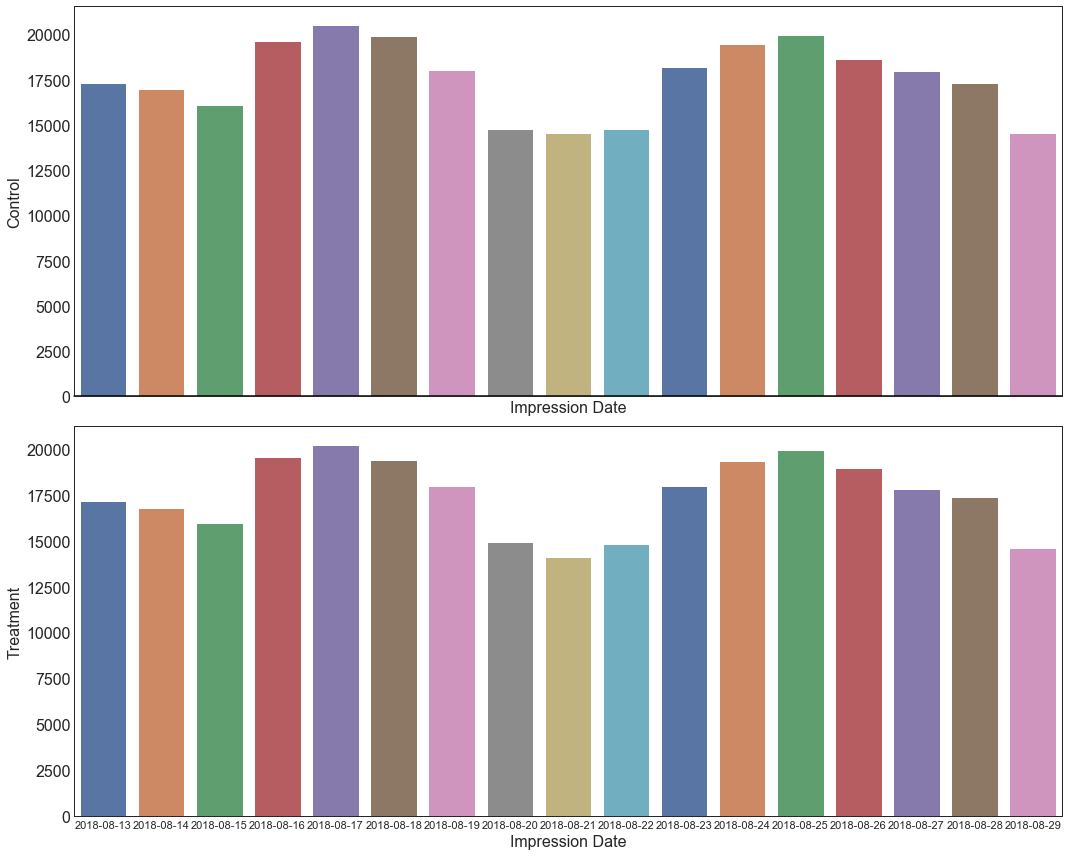

In [165]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

sns.barplot(x=df_ctl['imp_dt'], y=df_ctl['imps'], palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Control")
ax1.set_xlabel("Impression Date")

sns.barplot(x=df_trt['imp_dt'], y=df_trt['imps'], palette="deep", ax=ax2)
ax2.set_ylabel("Treatment")
ax2.set_xlabel("Impression Date")

ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=11)
plt.tight_layout()
plt.show()

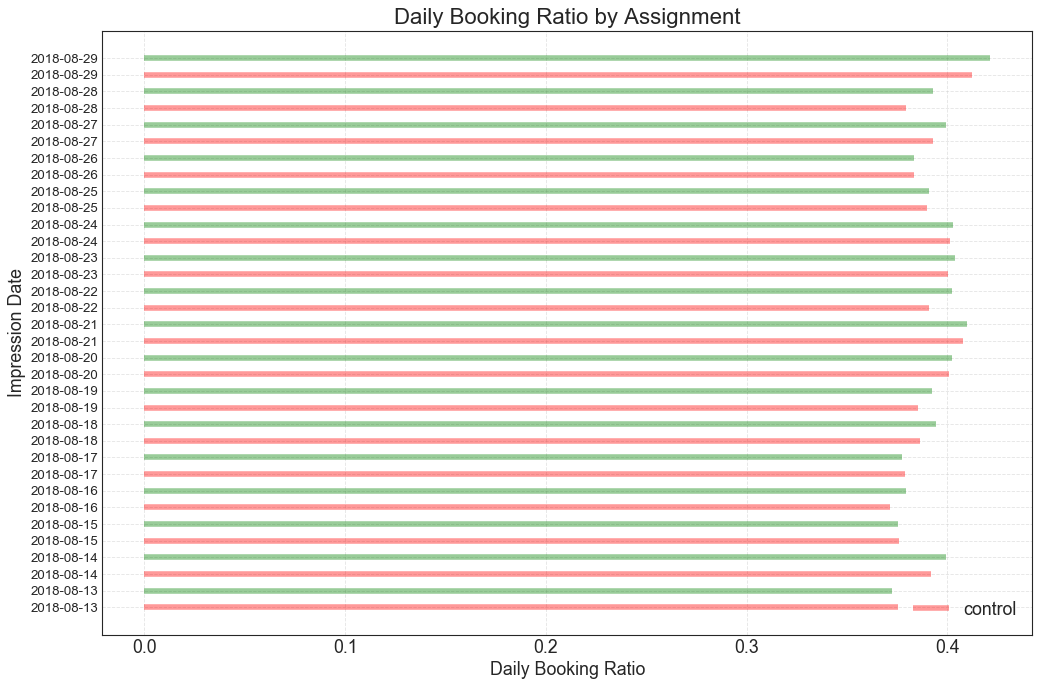

In [159]:
df['colors'] = ['red' if v=='control' else 'green' for u,v in zip(df['booking_ratio'], df['assignment'])]

plt.figure(figsize=(15,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.booking_ratio, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='Impression Date', xlabel='Daily Booking Ratio')
#plt.xticks(df.index, df.cars, fontsize=12)
plt.yticks(df.index, df.imp_dt, fontsize=12)
plt.title('Daily Booking Ratio by Assignment', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.legend({'treatment': 'green'},loc='lower right')
plt.legend({'control': 'red'},loc='lower right')
plt.show()

#### Second Metrics

In [28]:
missing = all[all['impression_time'].isnull()==True]
all_gap = all.drop(missing.index, axis=0)
all_gap['booking_value_realized'] = all_gap['booking_value_usd']*all_gap['booking_successful']
all_gap['imp_dt'] = all_gap['impression_time'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%y %H:%M'))
all_gap['checkin_dt'] = all_gap['date_of_checkin'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%y %H:%M'))
all_gap['delta'] = all_gap['checkin_dt'] - all_gap['imp_dt']
all_gap['gap'] = all_gap['delta'].apply(lambda x: max(0, x.days))

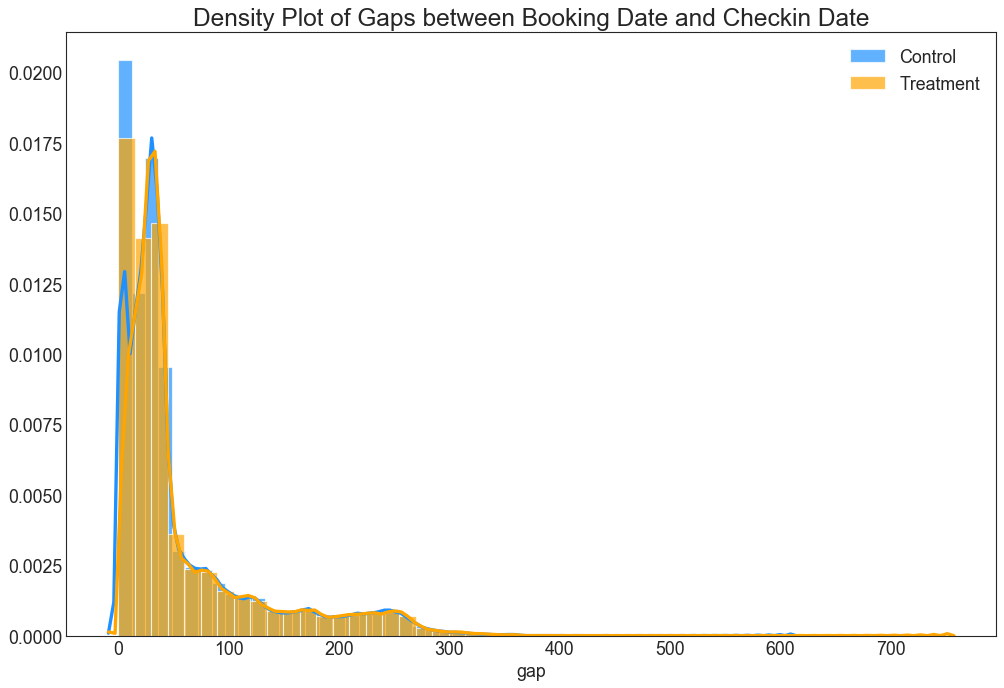

In [29]:
# Draw Plot
plt.figure(figsize=(15,10), dpi= 80)
sns.distplot(all_gap.loc[(all_gap['assignment'] == 'control') , 'gap'], color="dodgerblue", label="Control", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(all_gap.loc[(all_gap['assignment'] == 'treatment'), 'gap'], color="orange", label="Treatment", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

# Decoration
plt.title('Density Plot of Gaps between Booking Date and Checkin Date', fontsize=22)
plt.legend()
plt.show()

In [30]:
all_gap['booking_value_usd'].describe()

count    5.961310e+05
mean     6.331681e+02
std      1.220489e+04
min      1.001000e+01
25%      1.366500e+02
50%      3.450400e+02
75%      7.016600e+02
max      9.289329e+06
Name: booking_value_usd, dtype: float64

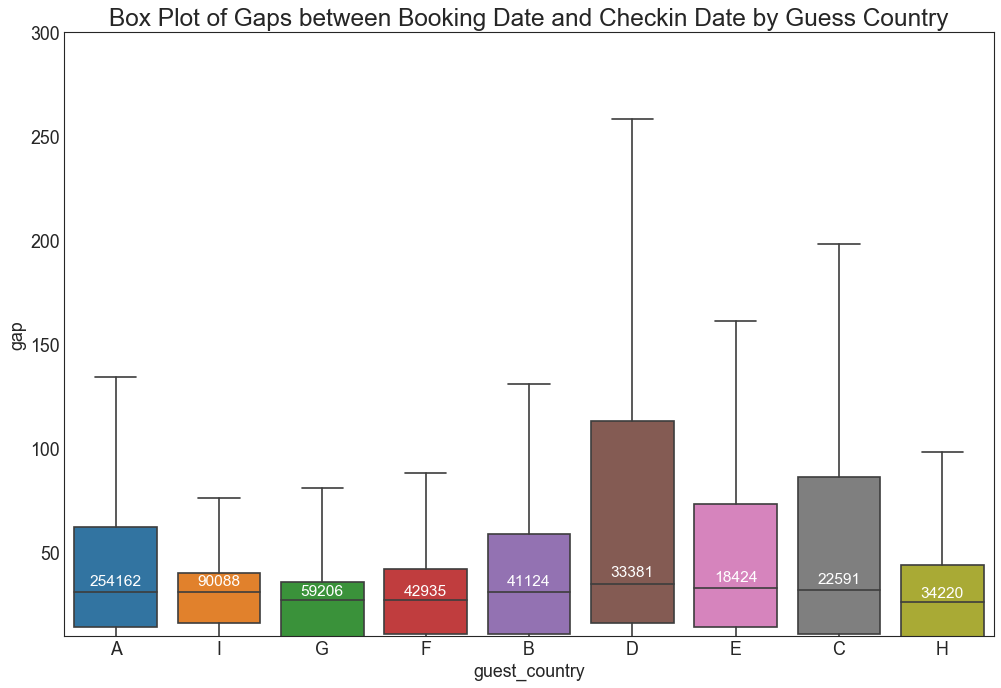

In [31]:
plt.figure(figsize=(15,10), dpi= 80)
sns.boxplot(x='guest_country', y='gap', data=all_gap, notch=False, showfliers=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.10, str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(all_gap,group_col='guest_country',y='gap')    

# Decoration
plt.title('Box Plot of Gaps between Booking Date and Checkin Date by Guess Country', fontsize=22)
plt.ylim(10, 300)
plt.show()

/Users/ling/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

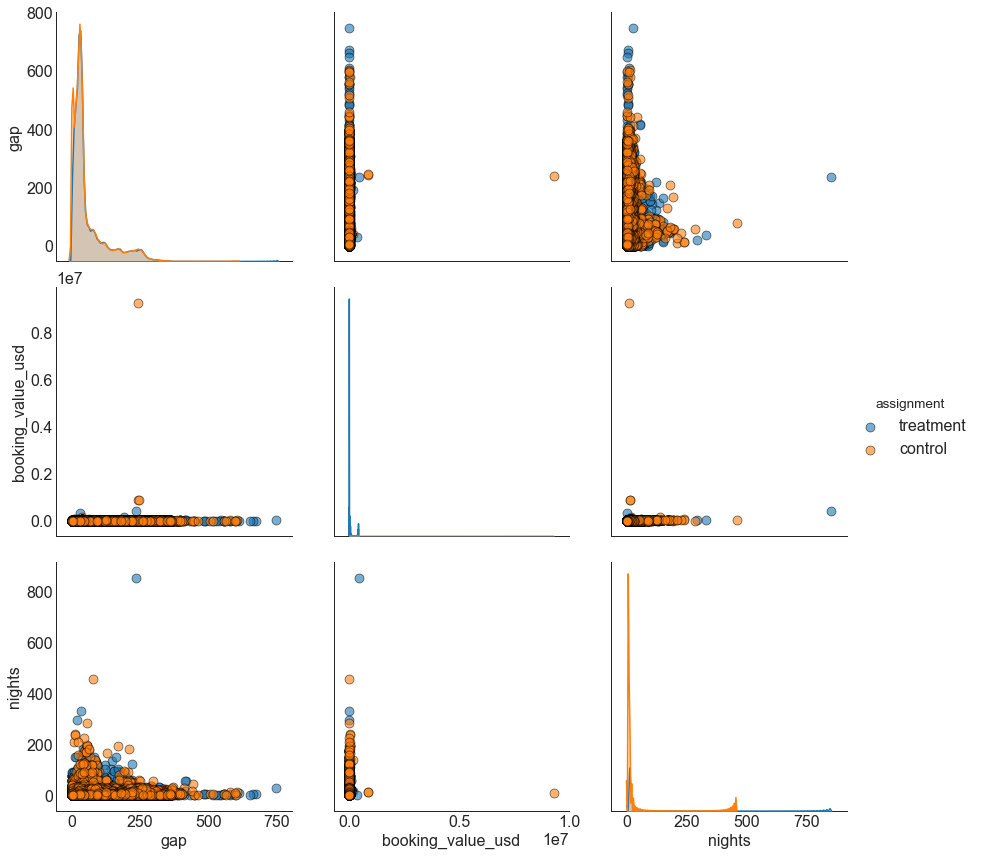

In [84]:
# Density Plot
df = all_gap[['assignment','gap', 'booking_value_usd', 'nights']]
plt.figure(figsize=(15,10), dpi= 80)
sns.pairplot(df, kind="scatter", hue='assignment', plot_kws = {'alpha': 0.6, 's': 60, 'edgecolor': 'k'}, size = 4)
plt.show()

### Question 2 a)

In [59]:
df1 = all.groupby(['assignment', 'payment_option_fillna', 'booking_successful']).size().reset_index(name='imps')
df1

,assignment,payment_option_fillna,booking_successful,imps
0,control,missing,0.0,182687
1,control,pay_in_full,1.0,116327
2,treatment,missing,0.0,180234
3,treatment,pay_in_full,1.0,94842
4,treatment,pluf,1.0,22041


In [60]:
df2 = all.groupby(['assignment', 'payment_option_fillna', 'booking_successful'])['booking_value_realized'].mean().reset_index(name='booking_value_realized_imp')
df2

,assignment,payment_option_fillna,booking_successful,booking_value_realized_imp
0,control,missing,0.0,0.000000
1,control,pay_in_full,1.0,393.675677
2,treatment,missing,0.0,0.000000
3,treatment,pay_in_full,1.0,278.952966
4,treatment,pluf,1.0,968.798476


In [61]:
df3 = all.groupby(['assignment', 'payment_option_fillna', 'booking_successful'])['booking_value_realized'].sum().reset_index(name='booking_value_realized_tot')
df3

,assignment,payment_option_fillna,booking_successful,booking_value_realized_tot
0,control,missing,0.0,0.000000e+00
1,control,pay_in_full,1.0,4.579511e+07
2,treatment,missing,0.0,0.000000e+00
3,treatment,pay_in_full,1.0,2.645646e+07
4,treatment,pluf,1.0,2.135329e+07


In [63]:
df4 = all.groupby(['assignment', 'payment_option_fillna', 'booking_successful'])['guest_id'].nunique().reset_index(name='users')
df4

,assignment,payment_option_fillna,booking_successful,users
0,control,missing,0.0,116301
1,control,pay_in_full,1.0,109944
2,treatment,missing,0.0,114779
3,treatment,pay_in_full,1.0,89634
4,treatment,pluf,1.0,21520


In [68]:
result=pd.concat([df1,df2,df3,df4], axis=1)
result.to_csv("result.csv")

### Question 2 d)

In [180]:
# perform power analysis for t-tests
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effects = [0.01]
alpha = 0.05
power = 0.8

# perform power analysis
def cal_size(effect, alpha, power):
    analysis = TTestIndPower()
    result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
    return result

results = [cal_size(effect, alpha, power) for effect in effects] 

In [181]:
print(results)

[156978.1728602031]


In [182]:
df['imps'].describe()

count       34.000000
mean     17533.264706
std       1986.442035
min      14107.000000
25%      16022.250000
50%      17897.500000
75%      19406.500000
max      20537.000000
Name: imps, dtype: float64

In [183]:
[num*3/17533.264706 for num in results]

[26.859488319904983]